# Las podas de backtracking

El algoritmo de backtracking hace la misma recursión que fuera bruta, pero agrega una estrategia de podas para ramas de dos tipos:
- podas por factibilidad: se eliminan las ramas no factibles
- podas por optimalidad: se eliminan las ramas que no serán óptimas.

Ahora veremos como se comportan ambas podas para distintos conjuntos.

Hipotesis:
- La poda de factibilidad no es efectiva cuando los $r_i$ son altos y los $w_i$ bajos, pero optimalidad si es efectiva en estas codiciones.
- La poda de optimalidad no es efectiva cuando los $w_i$ son altos y los $r_i$ bajos, pero factibilidad si es efectiva en estas codiciones.

Para esto haremos el siguiente procedimiento:
1. Cremos instancias para distitnso $n$ donde los $r_i$ son altos y los $w_i$ bajos, y otra donde los $w_i$ son altos y los $r_i$ bajos.
2. Tomamos muestras de la ejecución de ambas muestras en tres algoritmos propuestos:
    1. Backtracking full, ambas podas.
    2. Fuerza bruta + poda de factibilidad. Sin poda de optimalidad.
    3. Fuerza bruta + poda de optimalidad. Sin poda de factibilidad.

3. Graficamos esto en comparación con $f(x) = 2^n$, que seria el comportamiento de backtracking sin ninguna poda.

In [50]:
# Importamos librerias

import numpy as np
import time
import os
import matplotlib.pyplot as plt
from scipy import stats

In [51]:
# Carpeta general
!rm -rf ../instancias/podas
!mkdir ../instancias/podas

In [52]:
# Generador de instancias

def gen(
    ns,
    _path,
    k,
    _R = (500000, 600000),
    _w = (1, 10),
    _r = (80, 100)
):
    for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]
            f = open((_path + "{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

In [53]:
# Experimento

def experimentar(ns, path):
    timepos_ambas = []
    tiempos_opt = []
    tiempos_fact = []

    for i in ns:
        tiempo_acum_ambas = []
        tiempo_acum_opt = []
        tiempo_acum_fact = []

        for j in range(_k):
            start = time.time()
            os.system(("./../algo3-tp1 ./../" + path + "{}_{}.in 2").format(i, j))
            tiempo_acum_ambas.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 5".format(i, j))
            tiempo_acum_opt.append(time.time() - start)

            start = time.time()
            os.system("./../algo3-tp1 ./../" + path + "{}_{}.in 4".format(i, j))
            tiempo_acum_fact.append(time.time() - start )


        timepos_ambas.append(tiempo_acum_ambas)
        tiempos_opt.append(tiempo_acum_opt)
        tiempos_fact.append(tiempo_acum_fact)
    
    return [timepos_ambas, tiempos_opt, tiempos_fact]

In [54]:
def graf_prom(ns, y, k, color, label):
    prom_ambas = [np.mean(y[k][i]) for i in range(len(y[0]))]
    plt.plot(ns, prom_ambas, color = color, label = label)

def graficar(ns, y, i, color):
    rows = [[] for i in range(_k)]
    
    for j in range(_k):
        for k in range(ns.size):
            rows[j].append(y[i][k][j])
    for j in range(len(rows)):
        plt.scatter(ns + i * 0.02, rows[j], color = color, alpha=0.8, s = 10)

Generamos 2 sets de 30 instancias de cada $n$ de 15 a 25:

- set _pesados_ con los $w_i$ entre 5 y 8 y los $r_i$ entre 40 y 50
- set _resitentes_ los $w_i$ entre 3 y 5 y los $r_i$ entre 40 y 50

Ejecutemos los algoritmos en todos los sets!

In [55]:
# Vamos con los pesados
ns_pesados = np.arange(15, 25)
_k = 30

In [56]:
# Generacion de casos
!rm -rf ../instancias/podas/pesados
!mkdir ../instancias/podas/pesados
gen(ns_pesados, "../instancias/podas/pesados/", _k, _w = (5, 8), _r = (40, 50))

In [57]:
# Ejecución
os.system("g++ ../src/main.cpp -o ../algo3-tp1")
y_pesados = experimentar(ns_pesados, "instancias/podas/pesados/")

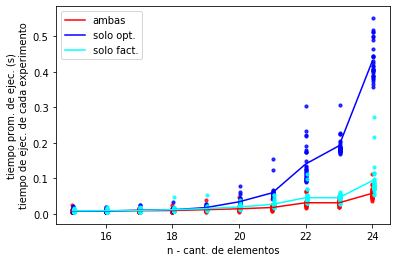

In [58]:
graf_prom(ns_pesados, y_pesados, 0, 'red', 'ambas')
graf_prom(ns_pesados, y_pesados, 1, 'blue', 'solo opt.')
graf_prom(ns_pesados, y_pesados, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(ns_pesados, y_pesados, 0, 'red')
graficar(ns_pesados, y_pesados, 1, 'blue')
graficar(ns_pesados, y_pesados, 2, 'cyan')

plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()

In [59]:
# Vamos con los resistentes
ns_resistentes = np.arange(15, 25)
_k = 10

In [60]:
# Generacion de casos
!rm -rf ../instancias/podas/resistentes
!mkdir ../instancias/podas/resistentes
gen(ns_resistentes, "../instancias/podas/resistentes/", _w = (3, 5), _r = (40, 50), k = _k)

In [61]:
# Ejecución
os.system("g++ ../src/main.cpp -o ../algo3-tp1")
y_resistentes = experimentar(ns_resistentes, "instancias/podas/resistentes/")

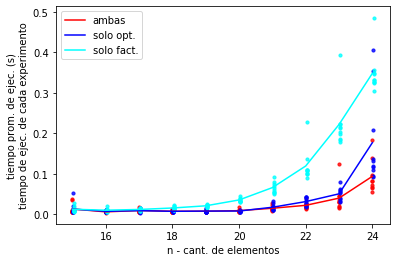

In [63]:
graf_prom(ns_resistentes, y_resistentes, 0, 'red', 'ambas')
graf_prom(ns_resistentes, y_resistentes, 1, 'blue', 'solo opt.')
graf_prom(ns_resistentes, y_rexsistentes, 2, 'cyan', 'solo fact.')
plt.legend()
graficar(ns_resistentes, y_resistentes, 0, 'red')
graficar(ns_resistentes, y_resistentes, 1, 'blue')
graficar(ns_resistentes, y_resistentes, 2, 'cyan')

plt.xlabel('n - cant. de elementos')
plt.ylabel('tiempo prom. de ejec. (s)\ntiempo de ejec. de cada experimento')

plt.show()